In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
garminconnect_df = pd.read_csv("../data/raw/20250313_1234_garminconnect_gplay_reviews.csv")

In [3]:
garminconnect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125856 entries, 0 to 125855
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              125856 non-null  object
 1   userName              125856 non-null  object
 2   userImage             125856 non-null  object
 3   content               125831 non-null  object
 4   score                 125856 non-null  int64 
 5   thumbsUpCount         125856 non-null  int64 
 6   reviewCreatedVersion  119156 non-null  object
 7   at                    125856 non-null  object
 8   replyContent          3817 non-null    object
 9   repliedAt             3817 non-null    object
 10  appVersion            119156 non-null  object
dtypes: int64(2), object(9)
memory usage: 10.6+ MB


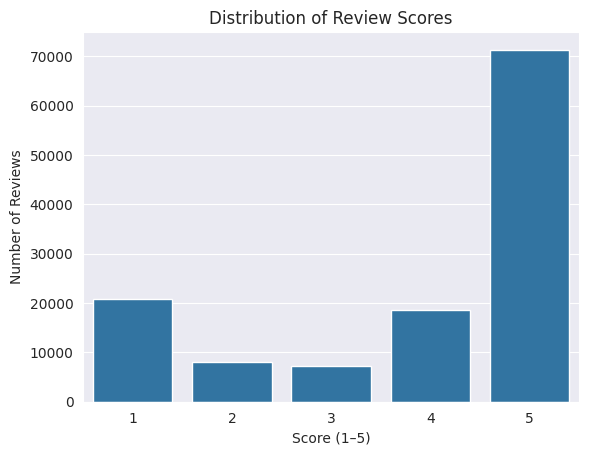

In [5]:
sns.countplot(data=garminconnect_df, x='score')
plt.title('Distribution of Review Scores')
plt.xlabel('Score (1–5)')
plt.ylabel('Number of Reviews')
plt.show()

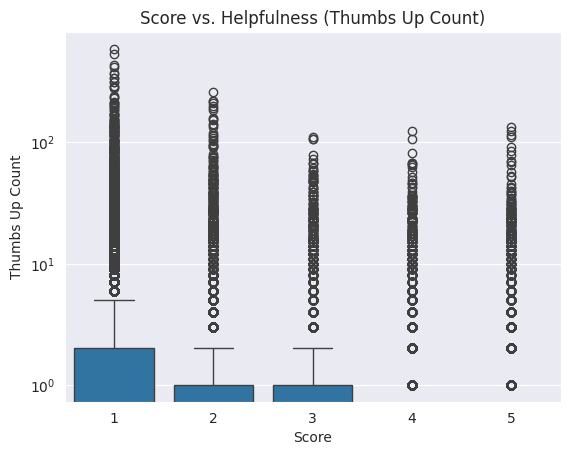

In [6]:
sns.boxplot(data=garminconnect_df, x='score', y='thumbsUpCount')
plt.title('Score vs. Helpfulness (Thumbs Up Count)')
plt.xlabel('Score')
plt.ylabel('Thumbs Up Count')
plt.yscale('log')
plt.show()

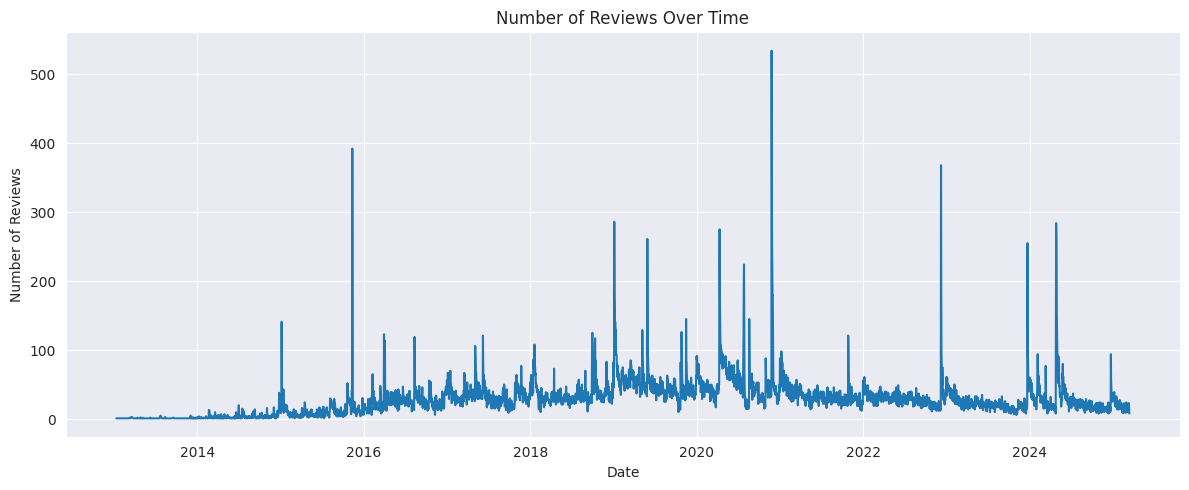

In [8]:
garminconnect_df['at'] = pd.to_datetime(garminconnect_df['at'])
reviews_by_date = garminconnect_df.groupby(garminconnect_df['at'].dt.date).size()

reviews_by_date.plot(figsize=(12, 5))
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

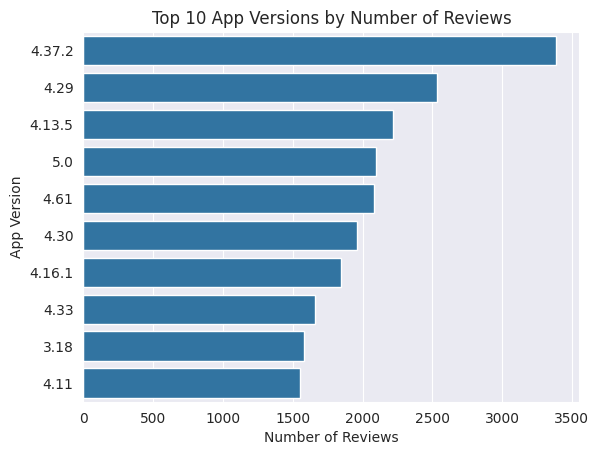

In [9]:
top_versions = garminconnect_df['appVersion'].value_counts().head(10)
sns.barplot(x=top_versions.values, y=top_versions.index)
plt.title('Top 10 App Versions by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('App Version')
plt.show()

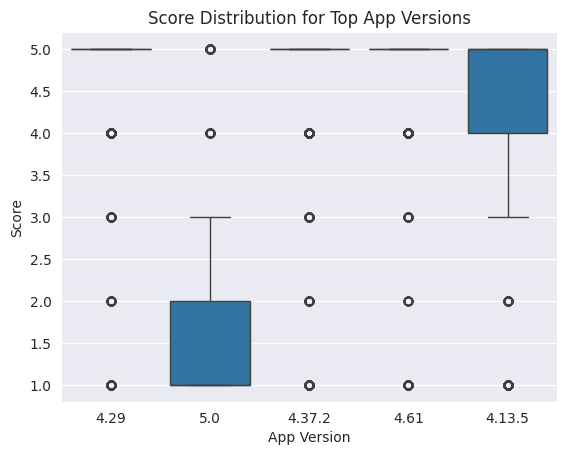

In [10]:
top_versions = garminconnect_df['appVersion'].value_counts().head(5).index
filtered = garminconnect_df[garminconnect_df['appVersion'].isin(top_versions)]
sns.boxplot(data=filtered, x='appVersion', y='score')
plt.title('Score Distribution for Top App Versions')
plt.xlabel('App Version')
plt.ylabel('Score')
plt.show()

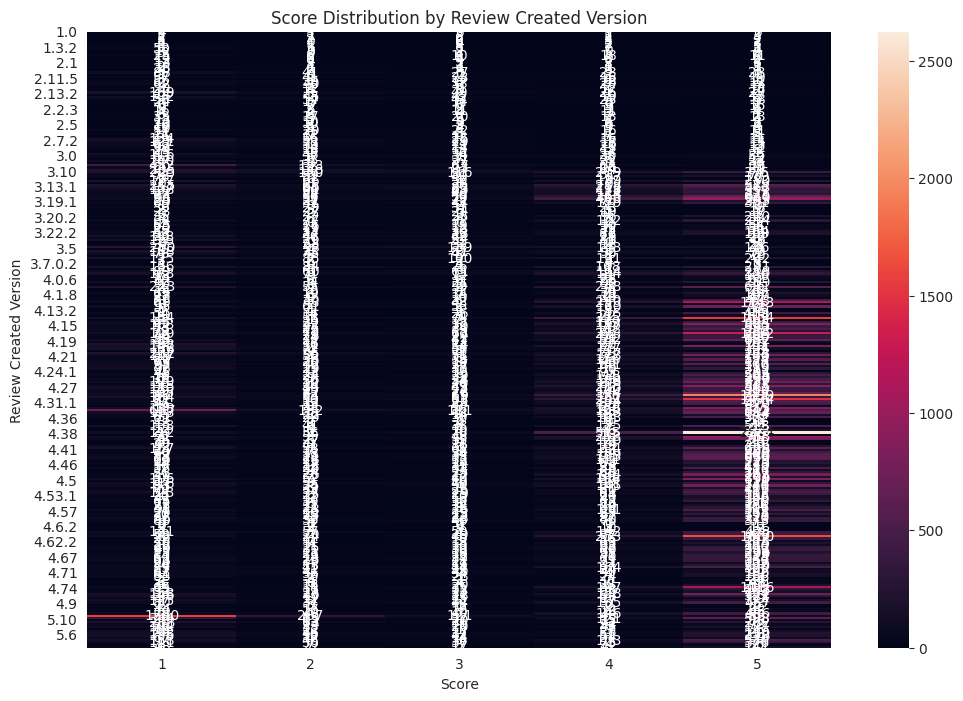

In [11]:
pivot = garminconnect_df.pivot_table(index='reviewCreatedVersion', columns='score', values='reviewId', aggfunc='count').fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt='g')
plt.title('Score Distribution by Review Created Version')
plt.xlabel('Score')
plt.ylabel('Review Created Version')
plt.show()

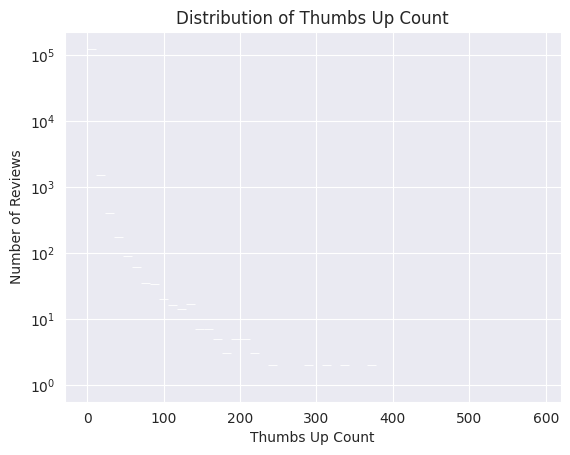

In [12]:
sns.histplot(garminconnect_df['thumbsUpCount'], bins=50, log_scale=(False, True))
plt.title('Distribution of Thumbs Up Count')
plt.xlabel('Thumbs Up Count')
plt.ylabel('Number of Reviews')
plt.show()

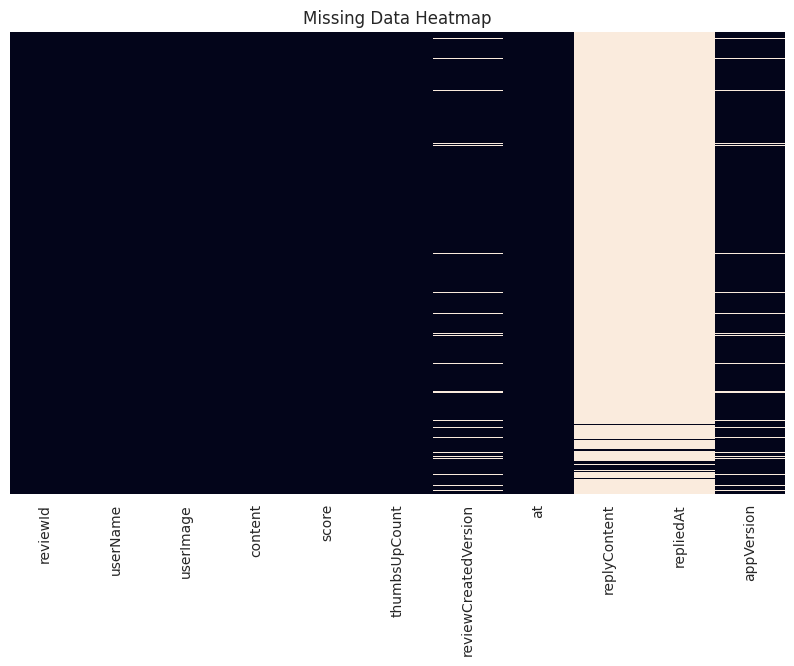

In [13]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(garminconnect_df.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

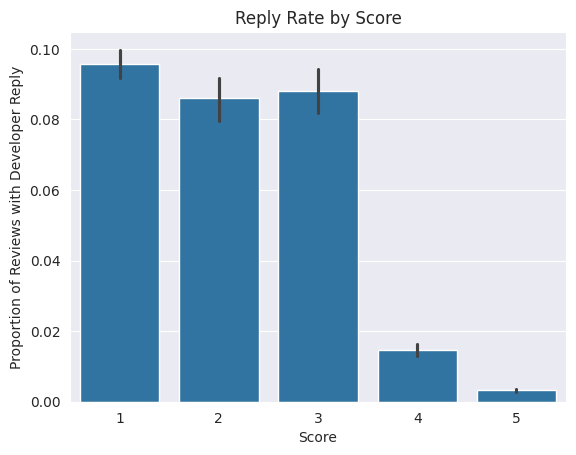

In [14]:
garminconnect_df['has_reply'] = garminconnect_df['replyContent'].notna()
sns.barplot(data=garminconnect_df, x='score', y='has_reply')
plt.title('Reply Rate by Score')
plt.ylabel('Proportion of Reviews with Developer Reply')
plt.xlabel('Score')
plt.show()